# **Retrieval with k-NN**

In [1]:
import sys

sys.path.insert(0, "..\\Scripts")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Load dataset**

In [2]:
base_feature_path = '../Features/features/'
base_labels_path = '../Features/labels/'

### **Load train small dataset**


In [3]:
feat_small = np.load(base_feature_path + 'mobilenet_v3_classifier.npy')
labs_small = np.load(base_labels_path + 'mobilenet_v3_classifier.npy')

In [4]:
df_small = pd.read_csv('../Dataset/train_small.csv', header=None)
df_small.columns = ['Image', 'Label']
df_small.head()

,Image,Label
0,train_059371.jpg,0
1,train_059389.jpg,0
2,train_059425.jpg,0
3,train_059445.jpg,0
4,train_059516.jpg,0


### **Load unlabelled dataset**

In [5]:
feat_unlabelled = np.load(base_feature_path + 'mobilenet_v3_classifier_unlabelled.npy')

In [6]:
df_unlabelled = pd.read_csv('../Dataset/train_unlabeled.csv', header=None)
df_unlabelled.columns = ['Image', 'Label']
df_unlabelled.head()

,Image,Label
0,train_059329.jpg,-1
1,train_059330.jpg,-1
2,train_059331.jpg,-1
3,train_059332.jpg,-1
4,train_059333.jpg,-1


## **Retrieval with k-NN**

In [7]:
from ImageRetrieval import NearestImageRetrieval

In [8]:
retrieval = NearestImageRetrieval(df_small, feat_small, df_unlabelled, feat_unlabelled, k=3)

In [9]:
retrieval.retrieve_images()

In [10]:
import seaborn as sns
sns.set_style("dark")

In [11]:
retrieval.save_results()

In [12]:
df_results = pd.read_csv('results.csv', header=None)
df_results.columns = ['Image', 'Label']
df_results.head()

,Image,Label
0,train_059371.jpg,0
1,train_059389.jpg,0
2,train_059425.jpg,0
3,train_059445.jpg,0
4,train_059516.jpg,0


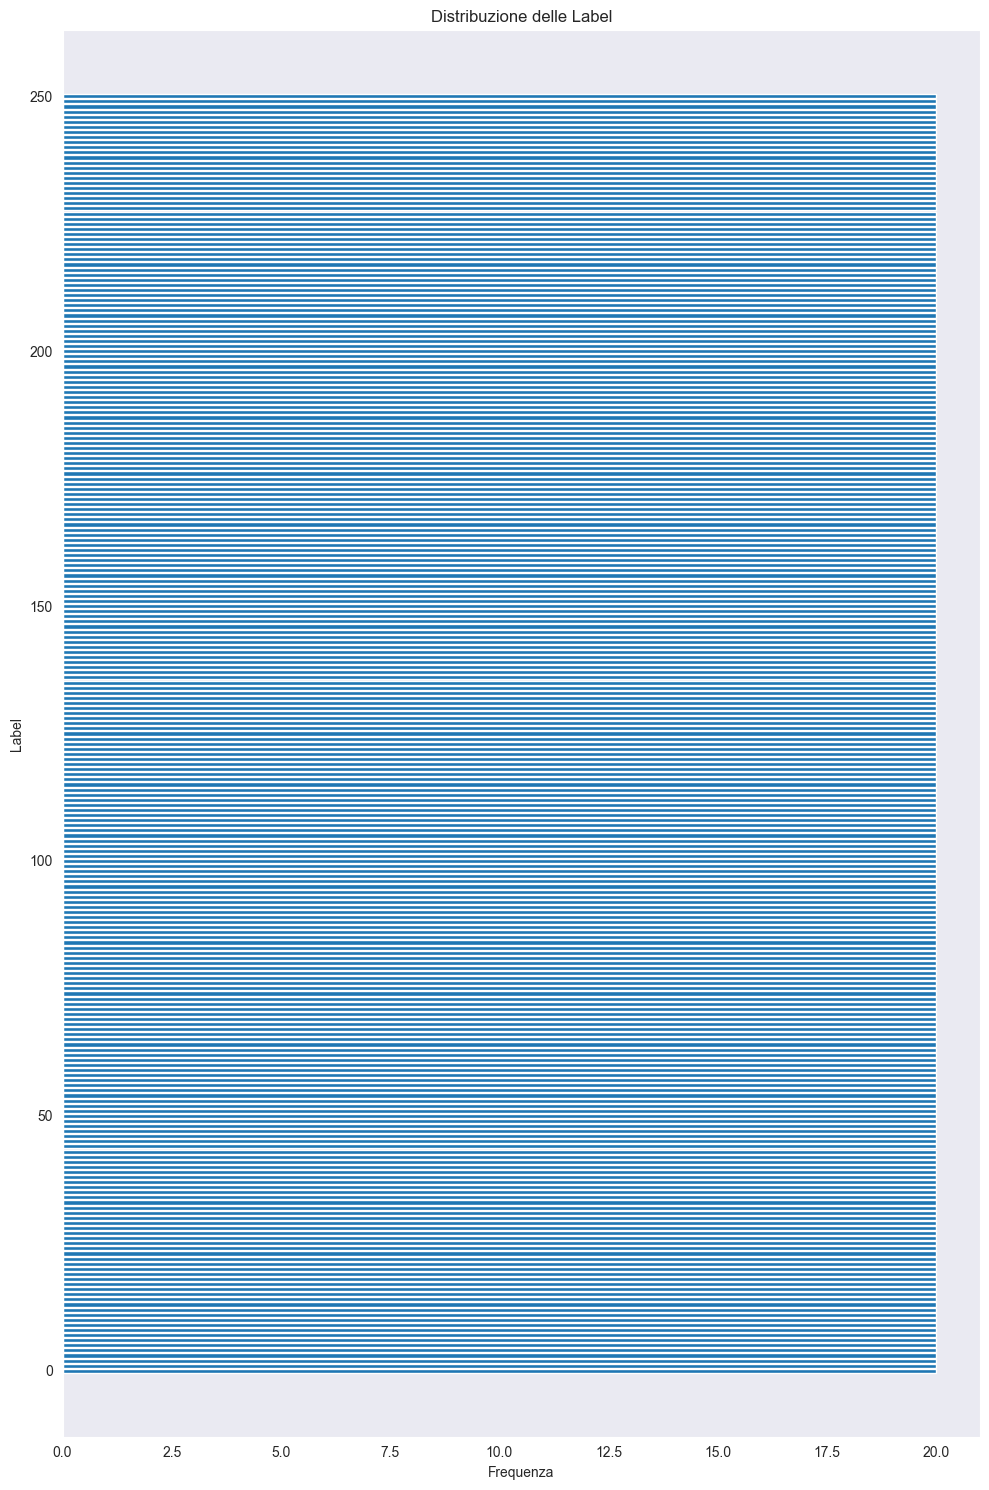

In [13]:
plt.figure(figsize=(10, 15))
label_counts = df_small['Label'].value_counts()
plt.barh(label_counts.index, label_counts.values)
plt.xlabel('Frequenza')
plt.ylabel('Label')
plt.title('Distribuzione delle Label')
plt.tight_layout()
plt.show()

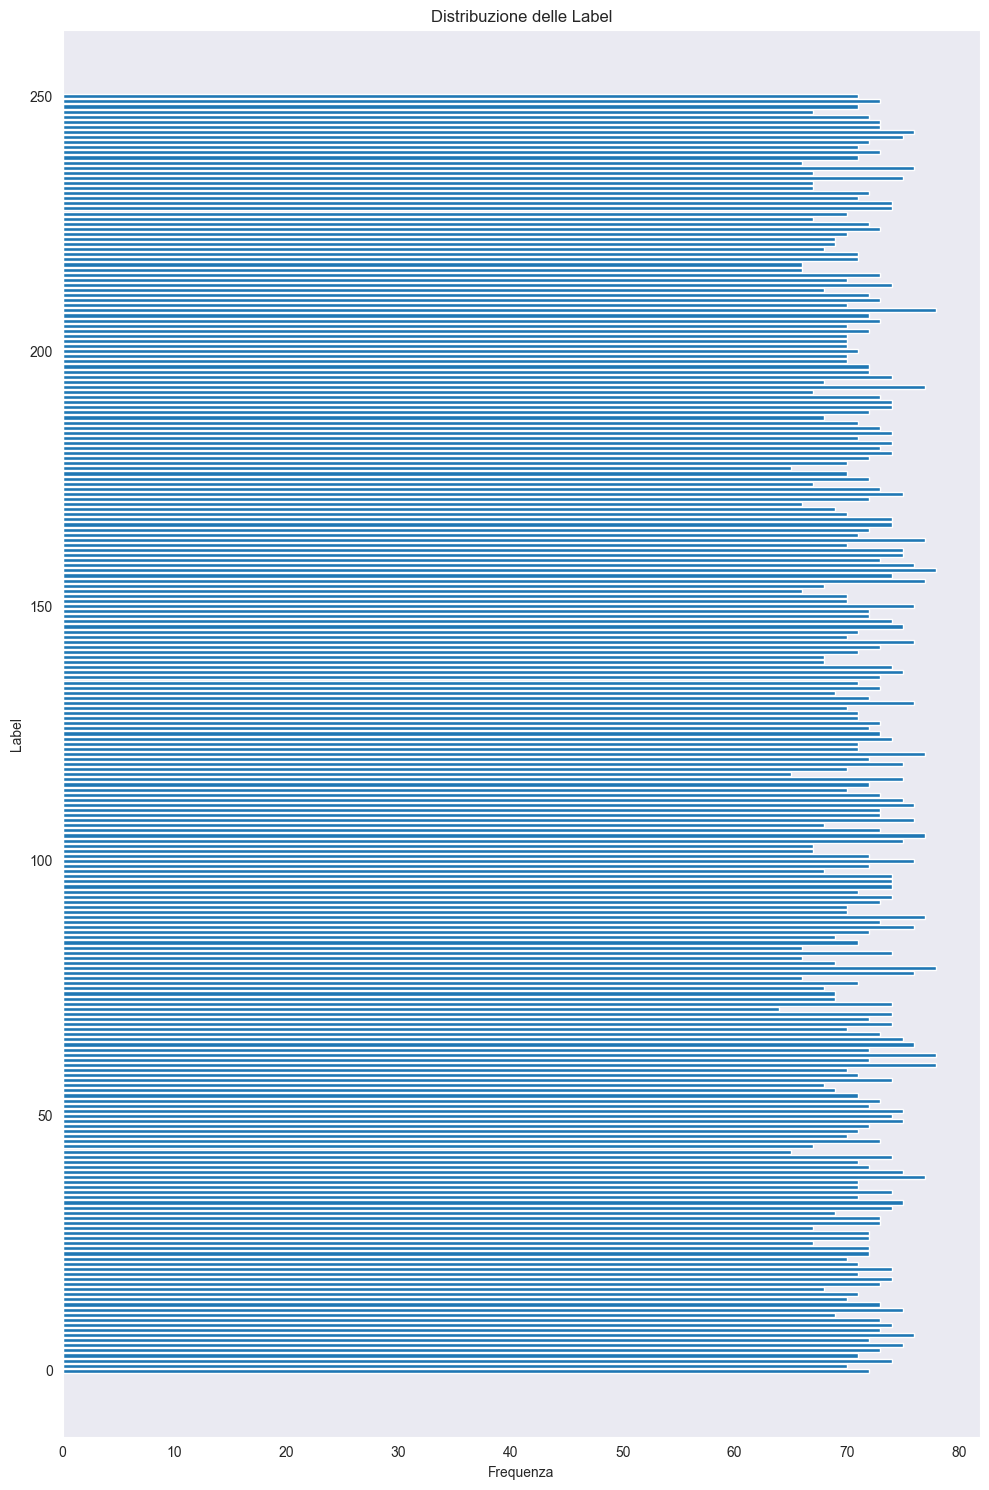

In [14]:
plt.figure(figsize=(10, 15))
label_counts = df_results['Label'].value_counts()
plt.barh(label_counts.index, label_counts.values)
plt.xlabel('Frequenza')
plt.ylabel('Label')
plt.title('Distribuzione delle Label')
plt.tight_layout()
plt.show()